In [1]:
from IPython.display import HTML, display

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
</script>''')

In [2]:
#######################################################
#      WELCOME TO HR ANALYTIC - PREDICTION FILE       #
#######################################################
#  TO HAVE A BETTER EXPERIENCE CLICK THE BUTTON THAT  #
# SAYS 'NO TRUSTED' TO CHANGE THE STATUS TO 'TRUSTED' #
#                                                     # 
#    SELECT OPTION KERNEL --> RESTART & RUN ALL       #
#######################################################
#   CLICK THE "VOILA" BUTTON ABOVE TO RUN AS AN APP   #
#######################################################
#                                                     #
#            THANK YOU - ALEJANDRA COLACILLI          #
#                                                     #
#######################################################

In [3]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.tree import DecisionTreeClassifier

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import selected dataframe with the data that will be used to train the Machine Learning algorithm 
clean_train = pd.read_csv('https://raw.githubusercontent.com/Alecolacilli/HR_Analytics/master/HR_Analytic_to_train.csv')

# Split the dataframe into data and labels
X_axis = clean_train.drop('Attrition', axis=1) # This will be the data
y_axis = clean_train.Attrition # This will be the labels

# The selected algorithm will be the Decision tree Classifier
# Split the dataset for train and test using the best random split

decision = tree.DecisionTreeClassifier(criterion='gini')
X = X_axis.values
Y = y_axis.values
indices = X_axis['EmployeeID']
X_train, X_test, Y_train, Y_test, Index_train, Index_test = train_test_split(X, Y, indices, test_size=0.25, random_state = 4)

<h1 style="text-align: center;"><span style="color: #ff9900;">Prediction</span></h1>

After the evaluation of different data analytics algorithms, we choose the Decision Tree Classifier because of the performance and accuracy provided.


In [5]:
# Train the model
decision.fit(X_train, Y_train)

# Make a prediction with the test data
y_pred = decision.predict(X_test)
y_score = decision.score(X_test, Y_test)
print('Accuracy: ', y_score)

# Compute the average precision score
micro_precision = precision_score(y_pred, Y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, Y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, Y_test, average=None)
print('Per-class precision score:', per_class_precision)

predict = y_pred

Accuracy:  0.986046511627907
Micro-averaged precision score: 0.99
Macro-averaged precision score: 0.97
Per-class precision score: [0.9921875  0.95530726]


<h2 style="text-align: left;"><span style="color: #ff9900;">Most relevant information</span></h2>
Following you will see the most relevant attributes when it comes to deciding whether to stay or leave the company:

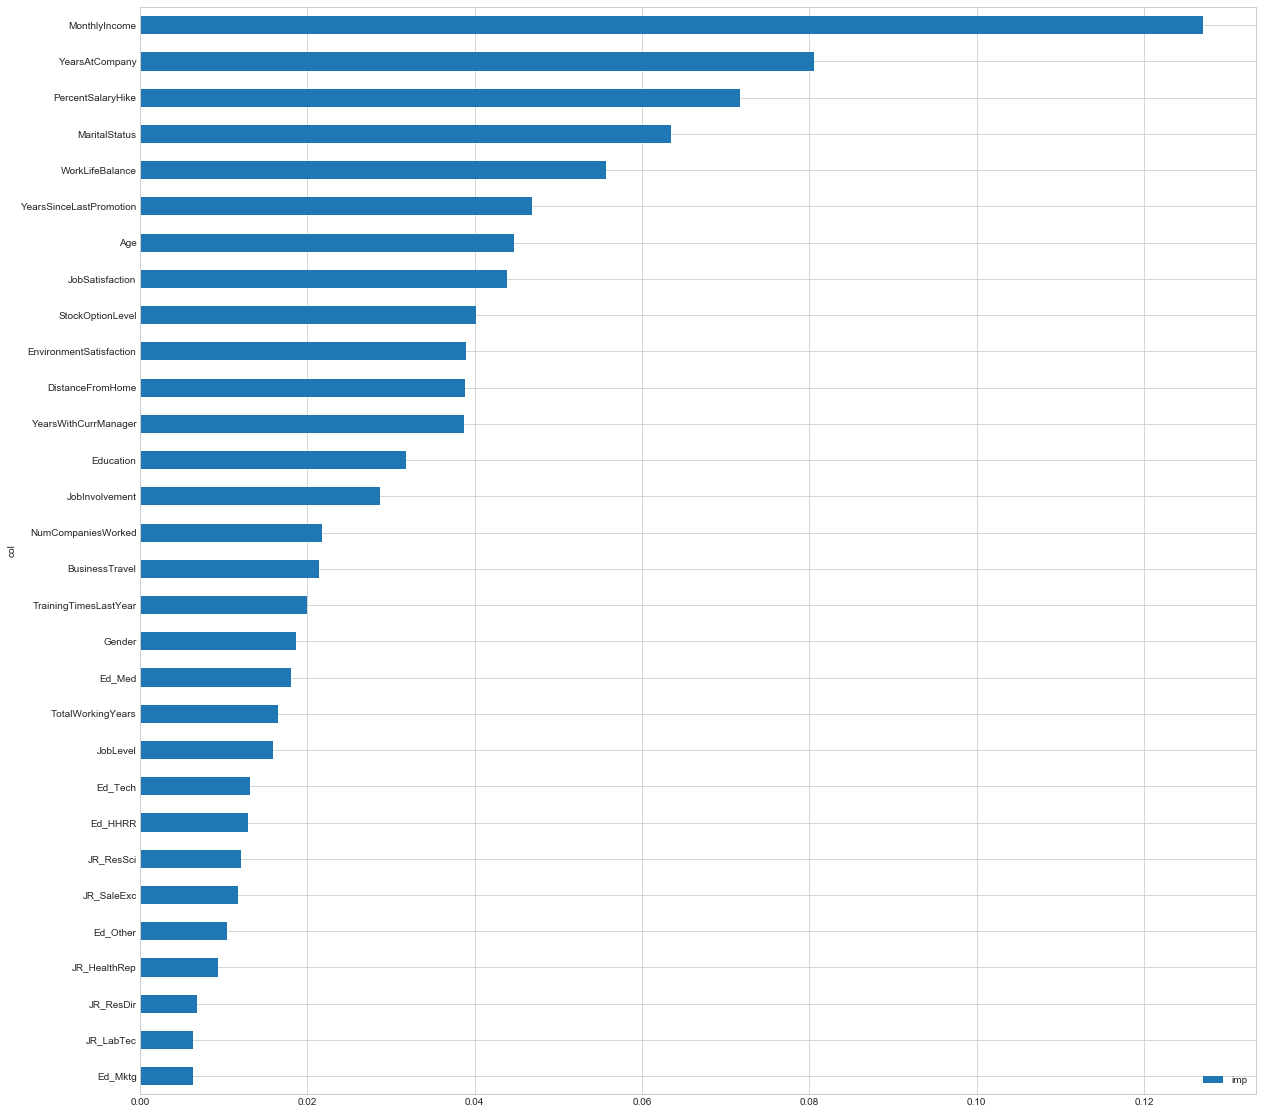

In [6]:
# DataFrame column importance
def data_importance(algorithm, data):
    fea_imp = pd.DataFrame({'imp': algorithm.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, True]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 20))

# Plot the feature importance scores       
data_importance(decision, X_axis)

<h2 style="text-align: left;"><span style="color: #ff9900;">Predicted Data</span></h2>

We can conclude this evaluation with the analysis of the predictions.
Below you will find some graphs and interactive querys that will help you to understand how those attributes could affect on each employee decition to leave the company

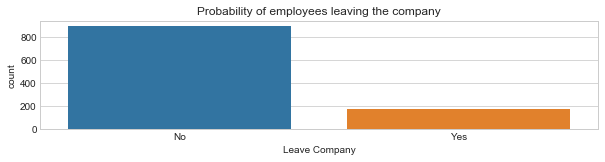

In [7]:
presentation = pd.DataFrame()

presentation['EmployeeID'] = Index_test
presentation['Leave Company'] = y_pred
presentation['Leave Company'] = np.where(presentation['Leave Company'] == 1, 'Yes', 'No') # change attrition value No = 0 and Yes = 1

fig, (ax1) = plt.subplots(figsize=(10,2))
ax1 = sns.countplot(x='Leave Company', data=presentation, ax=ax1).set_title('Probability of employees leaving the company')

presentation = presentation.sort_values(by='EmployeeID', ascending=True)

In [8]:
df_plot = pd.DataFrame()
df_plot['Leave Company'] = presentation['Leave Company'] 

for i in X_axis:
    df_plot[i] = X_axis[i]

qgrid_plot = pd.DataFrame()
qgrid_plot['ID']=df_plot['EmployeeID']
qgrid_plot['Leave Company']=df_plot['Leave Company']
qgrid_plot['Gender']=df_plot['Gender']
qgrid_plot['Age']=df_plot['Age']
qgrid_plot['Marital ST']=df_plot['MaritalStatus']
qgrid_plot['Income']=df_plot['MonthlyIncome']
qgrid_plot['Salary Hike']=df_plot['PercentSalaryHike']
qgrid_plot['Yrs at Co.']=df_plot['YearsAtCompany']
qgrid_plot['Yrs since promo']=df_plot['YearsSinceLastPromotion']
qgrid_plot['Env Satis']=df_plot['EnvironmentSatisfaction']
qgrid_plot['WorkLifeBalance']=df_plot['WorkLifeBalance']
qgrid_plot['Job Satis']=df_plot['JobSatisfaction']
qgrid_plot['No. Co. Worked']=df_plot['NumCompaniesWorked']
qgrid_plot['Education']=df_plot['Education']

The following table shows the prediction made by each employee and the most important factors evaluated:

In [9]:
from IPython.display import HTML, display
import qgrid

col_defs = {
    'ID': {'width': 35},
    'Marital ST': {'width': 80},
    'Salary Hike': {'width': 85},
    'Years in Co.': {'width': 85},
    'Yrs since promo': {'width': 85},
    'WorkLifeBalance': {'width': 85},
    'No. Co. Worked': {'width': 85}    
}

df_widget = qgrid.show_grid(qgrid_plot, show_toolbar=True, column_definitions=col_defs, grid_options={
    # SlickGrid options
    'fullWidthRows': True,
    'syncColumnCellResize': False,
    'forceFitColumns': False,
    'defaultColumnWidth': 65,
    'rowHeight': 25,
    'enableColumnReorder': False,
    'enableTextSelectionOnCells': True,
    'editable': False,
    'autoEdit': False,
    'explicitInitialization': True,
    'filter_dropdown_shown': True,

    # Qgrid options
    'maxVisibleRows': 15,
    'minVisibleRows': 8,
    'sortable': True,
    'filterable': True,
    'highlightSelectedCell': False,
    'highlightSelectedRow': True},
    
    column_options={
    # SlickGrid column options
    'defaultSortAsc': True,
    'maxWidth': 200,
    'minWidth': 10,
    'resizable': True,
    'sortable': True,
    'toolTip': "",
    'width': None
})
df_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': False, 'forceFitColumns': False, 'def…

We can conclude that there is more than one factor that motivates an employee to consider leaving the company.

The graph below shows the relationship between the monthly income received by the employee and the probability that the person considers leaving or staying at the company.

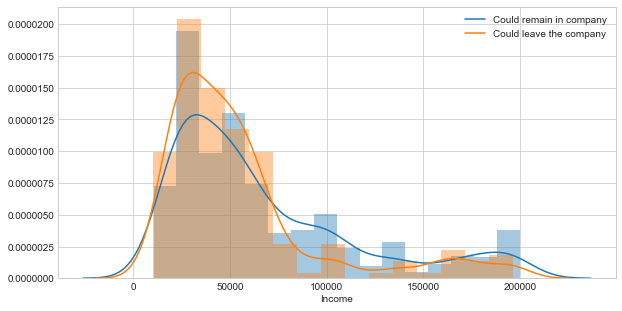

In [10]:
# How does the Monthly Income looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(qgrid_plot.loc[qgrid_plot['Leave Company'] == ('No')]['Income'], kde_kws={'label': 'Could remain in company'});
sns.distplot(qgrid_plot.loc[qgrid_plot['Leave Company'] == ('Yes')]['Income'], kde_kws={'label': 'Could leave the company'});